## Homework 6


#### Exercise 10 
This question should be answered using the Weekly data set, which is part of the ISLR package. This data is similar in nature to the Smarket data from this chapter’s lab, except that it contains 1,089 weekly returns for 21 years, from the beginning of 1990 to the end of 2010.

(a) Produce some numerical and graphical summaries of the Weekly data. Do there appear to be any patterns?

In [16]:
install.packages('ISLR')
library(tidyverse)
library(ISLR)
summary(Weekly)

Warning message:
"package 'ISLR' is in use and will not be installed"


      Year           Lag1               Lag2               Lag3         
 Min.   :1990   Min.   :-18.1950   Min.   :-18.1950   Min.   :-18.1950  
 1st Qu.:1995   1st Qu.: -1.1540   1st Qu.: -1.1540   1st Qu.: -1.1580  
 Median :2000   Median :  0.2410   Median :  0.2410   Median :  0.2410  
 Mean   :2000   Mean   :  0.1506   Mean   :  0.1511   Mean   :  0.1472  
 3rd Qu.:2005   3rd Qu.:  1.4050   3rd Qu.:  1.4090   3rd Qu.:  1.4090  
 Max.   :2010   Max.   : 12.0260   Max.   : 12.0260   Max.   : 12.0260  
      Lag4               Lag5              Volume            Today         
 Min.   :-18.1950   Min.   :-18.1950   Min.   :0.08747   Min.   :-18.1950  
 1st Qu.: -1.1580   1st Qu.: -1.1660   1st Qu.:0.33202   1st Qu.: -1.1540  
 Median :  0.2380   Median :  0.2340   Median :1.00268   Median :  0.2410  
 Mean   :  0.1458   Mean   :  0.1399   Mean   :1.57462   Mean   :  0.1499  
 3rd Qu.:  1.4090   3rd Qu.:  1.4050   3rd Qu.:2.05373   3rd Qu.:  1.4050  
 Max.   : 12.0260   Max.   : 12.0

In [20]:
cor(Weekly[,-9])

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Year,1.00000000,-0.032289274,-0.03339001,-0.03000649,-0.031127923,-0.030519101,0.84194162,-0.032459894
Lag1,-0.03228927,1.000000000,-0.07485305,0.05863568,-0.071273876,-0.008183096,-0.06495131,-0.075031842
Lag2,-0.03339001,-0.074853051,1.00000000,-0.07572091,0.058381535,-0.072499482,-0.08551314,0.059166717
Lag3,-0.03000649,0.058635682,-0.07572091,1.00000000,-0.075395865,0.060657175,-0.06928771,-0.071243639
Lag4,-0.03112792,-0.071273876,0.05838153,-0.07539587,1.000000000,-0.075675027,-0.06107462,-0.007825873
Lag5,-0.03051910,-0.008183096,-0.07249948,0.06065717,-0.075675027,1.000000000,-0.05851741,0.011012698
Volume,0.84194162,-0.064951313,-0.08551314,-0.06928771,-0.061074617,-0.058517414,1.00000000,-0.033077783
Today,-0.03245989,-0.075031842,0.05916672,-0.07124364,-0.007825873,0.011012698,-0.03307778,1.000000000


- Volume seems to have a correlation with the Year. All the other correlations are close to 0. 

The following objects are masked from Weekly (pos = 3):

    Direction, Lag1, Lag2, Lag3, Lag4, Lag5, Today, Volume, Year


The following objects are masked from Weekly (pos = 4):

    Direction, Lag1, Lag2, Lag3, Lag4, Lag5, Today, Volume, Year




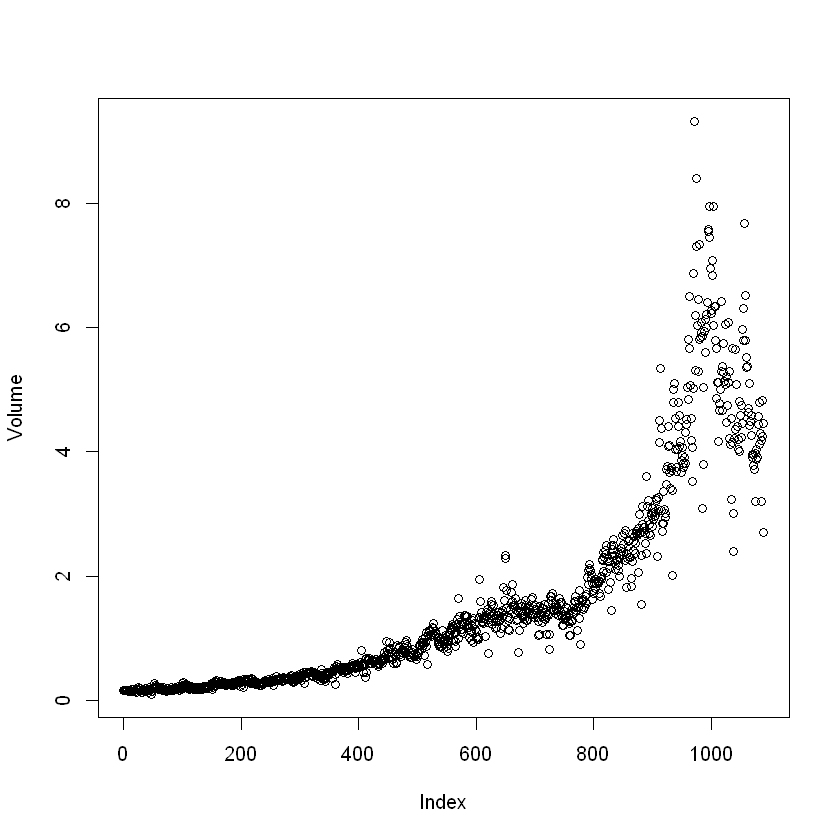

In [53]:
attach(Weekly)
plot(Volume)

- Volume increases over time. 

(b) Use the full data set to perform a logistic regression with Direction as the response and the five lag variables plus Volume as predictors. Use the summary function to print the results. Do any of the predictors appear to be statistically significant? If so, which ones?

In [55]:
Weekly_lm <- glm(Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + Volume, data = Weekly, family = binomial)

summary(Weekly_lm)


Call:
glm(formula = Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + 
    Volume, family = binomial, data = Weekly)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.6949  -1.2565   0.9913   1.0849   1.4579  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)   
(Intercept)  0.26686    0.08593   3.106   0.0019 **
Lag1        -0.04127    0.02641  -1.563   0.1181   
Lag2         0.05844    0.02686   2.175   0.0296 * 
Lag3        -0.01606    0.02666  -0.602   0.5469   
Lag4        -0.02779    0.02646  -1.050   0.2937   
Lag5        -0.01447    0.02638  -0.549   0.5833   
Volume      -0.02274    0.03690  -0.616   0.5377   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1496.2  on 1088  degrees of freedom
Residual deviance: 1486.4  on 1082  degrees of freedom
AIC: 1500.4

Number of Fisher Scoring iterations: 4


- Lag2 seems to be significant (p value is 0.0296)

(c) Compute the confusion matrix and overall fraction of correct predictions. Explain what the confusion matrix is telling you about the types of mistakes made by logistic regression.

In [58]:
Matrix <- predict(Weekly_lm, type = "response")
pred.glm <- rep("Down", length(probs))
pred.glm[Matrix > 0.5] <- "Up"
table(pred.glm, Direction)

        Direction
pred.glm Down  Up
    Down   54  48
    Up    430 557

(d) Now fit the logistic regression model using a training data period from 1990 to 2008, with Lag2 as the only predictor. Compute the confusion matrix and the overall fraction of correct predictions for the held out data (that is, the data from 2009 and 2010).

In [63]:
Weekly_2009 <- (Year < 2009)
Weekly_timeframe <- Weekly[!Weekly_2009, ]
Direction_training <- Direction[!Weekly_2009]
Weekly_lm2 <- glm(Direction ~ Lag2, data = Weekly, family = binomial, subset = Weekly_2009)
summary(Weekly_lm2)


Call:
glm(formula = Direction ~ Lag2, family = binomial, data = Weekly, 
    subset = Weekly_2009)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-1.536  -1.264   1.021   1.091   1.368  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)   
(Intercept)  0.20326    0.06428   3.162  0.00157 **
Lag2         0.05810    0.02870   2.024  0.04298 * 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1354.7  on 984  degrees of freedom
Residual deviance: 1350.5  on 983  degrees of freedom
AIC: 1354.5

Number of Fisher Scoring iterations: 4


(e) Repeat (d) using LDA.

In [69]:
library(MASS)
Weekly_lda <- lda(Direction ~ Lag2, data = Weekly, subset = Weekly_2009)
Weekly_lda

pred.lda <- predict(fit.lda, Weekly_timeframe)
table(pred.lda$class, Direction_training)

Call:
lda(Direction ~ Lag2, data = Weekly, subset = Weekly_2009)

Prior probabilities of groups:
     Down        Up 
0.4477157 0.5522843 

Group means:
            Lag2
Down -0.03568254
Up    0.26036581

Coefficients of linear discriminants:
           LD1
Lag2 0.4414162

      Direction_training
       Down Up
  Down    9  5
  Up     34 56

- Test-error rate seems to be about 38%

(f) Repeat (d) using QDA.

In [70]:
Weekly_qda <- qda(Direction ~ Lag2, data = Weekly, subset = Weekly_2009)
Weekly_qda
pred.qda <- predict(fit.qda, Weekly_timeframe)
table(pred.qda$class, Direction_training)

Call:
qda(Direction ~ Lag2, data = Weekly, subset = Weekly_2009)

Prior probabilities of groups:
     Down        Up 
0.4477157 0.5522843 

Group means:
            Lag2
Down -0.03568254
Up    0.26036581

      Direction_training
       Down Up
  Down    0  0
  Up     43 61

- Test-error rate seems to be about 41%


(g) Repeat (d) using KNN with K = 1.


In [72]:
library(class)
train.X <- as.matrix(Lag2[Weekly_2009])
test.X <- as.matrix(Lag2[!Weekly_2009])
train.Direction <- Direction[Weekly_2009]
set.seed(1)
pred.knn <- knn(train.X, test.X, train.Direction, k = 1)
table(pred.knn, Direction_training)

        Direction_training
pred.knn Down Up
    Down   21 30
    Up     22 31

- The test-error rate seems to be about 50%

(h) Which of these methods appears to provide the best results on
this data?

- LDA, it has the lowest test-error rate of all the methods. 

(i) Experiment with different combinations of predictors, includ- ing possible transformations and interactions, for each of the methods. Report the variables, method, and associated confu- sion matrix that appears to provide the best results on the held out data. Note that you should also experiment with values for K in the KNN classifier.


- Sorry, I didn't fully understand what I had to do here. 

#### Exercise 11 
In this problem, you will develop a model to predict whether a given car gets high or low gas mileage based on the Auto data set.


(a) Create a binary variable, mpg01, that contains a 1 if mpg contains a value above its median, and a 0 if mpg contains a value below its median. You can compute the median using the median() function. Note you may find it helpful to use the data.frame() function to create a single data set containing both mpg01 and the other Auto variables.

In [74]:
attach(Auto)
mpg01 <- rep(0, length(mpg))
mpg01[mpg > median(mpg)] <- 1
Auto <- data.frame(Auto, mpg01)

The following object is masked from package:ggplot2:

    mpg




(b) Explore the data graphically in order to investigate the associ- ation between mpg01 and the other features. Which of the other features seem most likely to be useful in predicting mpg01? Scat- terplots and boxplots may be useful tools to answer this ques- tion. Describe your findings.

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,mpg01
mpg,1.0000000,-0.7776175,-0.8051269,-0.7784268,-0.8322442,0.4233285,0.5805410,0.5652088,0.8369392
cylinders,-0.7776175,1.0000000,0.9508233,0.8429834,0.8975273,-0.5046834,-0.3456474,-0.5689316,-0.7591939
displacement,-0.8051269,0.9508233,1.0000000,0.8972570,0.9329944,-0.5438005,-0.3698552,-0.6145351,-0.7534766
horsepower,-0.7784268,0.8429834,0.8972570,1.0000000,0.8645377,-0.6891955,-0.4163615,-0.4551715,-0.6670526
weight,-0.8322442,0.8975273,0.9329944,0.8645377,1.0000000,-0.4168392,-0.3091199,-0.5850054,-0.7577566
acceleration,0.4233285,-0.5046834,-0.5438005,-0.6891955,-0.4168392,1.0000000,0.2903161,0.2127458,0.3468215
year,0.5805410,-0.3456474,-0.3698552,-0.4163615,-0.3091199,0.2903161,1.0000000,0.1815277,0.4299042
origin,0.5652088,-0.5689316,-0.6145351,-0.4551715,-0.5850054,0.2127458,0.1815277,1.0000000,0.5136984
mpg01,0.8369392,-0.7591939,-0.7534766,-0.6670526,-0.7577566,0.3468215,0.4299042,0.5136984,1.0000000


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,mpg01
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>
1,18,8,307,130,3504,12.0,70,1,chevrolet chevelle malibu,0
2,15,8,350,165,3693,11.5,70,1,buick skylark 320,0
3,18,8,318,150,3436,11.0,70,1,plymouth satellite,0
4,16,8,304,150,3433,12.0,70,1,amc rebel sst,0
5,17,8,302,140,3449,10.5,70,1,ford torino,0
6,15,8,429,198,4341,10.0,70,1,ford galaxie 500,0
7,14,8,454,220,4354,9.0,70,1,chevrolet impala,0
8,14,8,440,215,4312,8.5,70,1,plymouth fury iii,0
9,14,8,455,225,4425,10.0,70,1,pontiac catalina,0


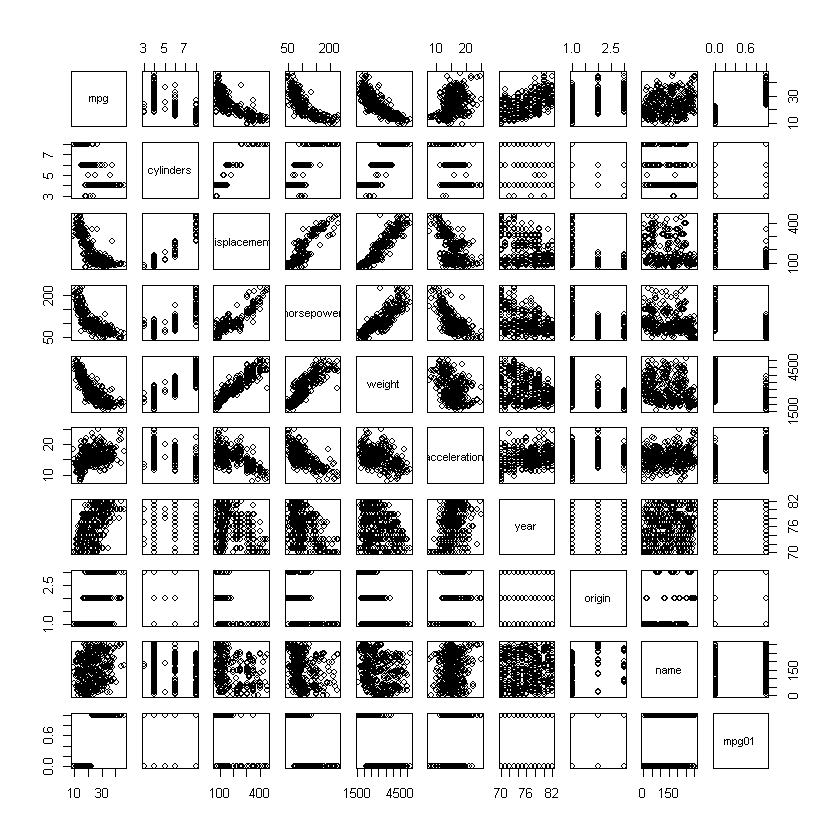

In [78]:
cor(Auto[, -9])
Auto
pairs(Auto)

(c) Split the data into a training set and a test set.

In [79]:
train <- (year %% 2 == 0)
Auto.train <- Auto[train, ]
Auto.test <- Auto[!train, ]
mpg01.test <- mpg01[!train]

(d) Perform LDA on the training data in order to predict mpg01 using the variables that seemed most associated with mpg01 in (b). What is the test error of the model obtained?

In [89]:
fit.lda <- lda(mpg01 ~ cylinders + weight + displacement + horsepower, data = Auto, subset = train)
fit.lda

pred.lda <- predict(fit.lda, Auto.test)
table(pred.lda$class, mpg01.test)

mean(pred.lda$class != mpg01.test)

Call:
lda(mpg01 ~ cylinders + weight + displacement + horsepower, data = Auto, 
    subset = train)

Prior probabilities of groups:
        0         1 
0.4571429 0.5428571 

Group means:
  cylinders   weight displacement horsepower
0  6.812500 3604.823     271.7396  133.14583
1  4.070175 2314.763     111.6623   77.92105

Coefficients of linear discriminants:
                       LD1
cylinders    -0.6741402638
weight       -0.0011465750
displacement  0.0004481325
horsepower    0.0059035377

   mpg01.test
     0  1
  0 86  9
  1 14 73

[1] 0.1263736

- The test-error rate ist 12.6%.

(e) Perform QDA on the training data in order to predict mpg01 using the variables that seemed most associated with mpg01 in (b). What is the test error of the model obtained?

In [86]:
fit.qda <- qda(mpg01 ~ cylinders + weight + displacement + horsepower, data = Auto, subset = train)
fit.qda

pred.qda <- predict(fit.qda, Auto.test)
table(pred.qda$class, mpg01.test)

mean(pred.qda$class != mpg01.test)

Call:
qda(mpg01 ~ cylinders + weight + displacement + horsepower, data = Auto, 
    subset = train)

Prior probabilities of groups:
        0         1 
0.4571429 0.5428571 

Group means:
  cylinders   weight displacement horsepower
0  6.812500 3604.823     271.7396  133.14583
1  4.070175 2314.763     111.6623   77.92105

   mpg01.test
     0  1
  0 89 13
  1 11 69

[1] 0.1318681

- The test-error rate is 13.2%

(f) Perform logistic regression on the training data in order to pre- dict mpg01 using the variables that seemed most associated with mpg01 in (b). What is the test error of the model obtained?

In [87]:
fit.glm <- glm(mpg01 ~ cylinders + weight + displacement + horsepower, data = Auto, family = binomial, subset = train)
summary(fit.glm)

probs <- predict(fit.glm, Auto.test, type = "response")
pred.glm <- rep(0, length(probs))
pred.glm[probs > 0.5] <- 1
table(pred.glm, mpg01.test)

mean(pred.glm != mpg01.test)


Call:
glm(formula = mpg01 ~ cylinders + weight + displacement + horsepower, 
    family = binomial, data = Auto, subset = train)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-2.48027  -0.03413   0.10583   0.29634   2.57584  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)  17.658730   3.409012   5.180 2.22e-07 ***
cylinders    -1.028032   0.653607  -1.573   0.1158    
weight       -0.002922   0.001137  -2.569   0.0102 *  
displacement  0.002462   0.015030   0.164   0.8699    
horsepower   -0.050611   0.025209  -2.008   0.0447 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 289.58  on 209  degrees of freedom
Residual deviance:  83.24  on 205  degrees of freedom
AIC: 93.24

Number of Fisher Scoring iterations: 7


        mpg01.test
pred.glm  0  1
       0 89 11
       1 11 71

[1] 0.1208791

- The test-error rate is 12.1%

(g) Perform KNN on the training data, with several values of K, in order to predict mpg01. Use only the variables that seemed most associated with mpg01 in (b). What test errors do you obtain? Which value of K seems to perform the best on this data set?

In [88]:
train.X <- cbind(cylinders, weight, displacement, horsepower)[train, ]
test.X <- cbind(cylinders, weight, displacement, horsepower)[!train, ]
train.mpg01 <- mpg01[train]
set.seed(1)
pred.knn <- knn(train.X, test.X, train.mpg01, k = 1)
table(pred.knn, mpg01.test)

mean(pred.knn != mpg01.test)

pred.knn <- knn(train.X, test.X, train.mpg01, k = 10)
table(pred.knn, mpg01.test)

mean(pred.knn != mpg01.test)

pred.knn <- knn(train.X, test.X, train.mpg01, k = 100)
table(pred.knn, mpg01.test)

mean(pred.knn != mpg01.test)

        mpg01.test
pred.knn  0  1
       0 83 11
       1 17 71

[1] 0.1538462

        mpg01.test
pred.knn  0  1
       0 77  7
       1 23 75

[1] 0.1648352

        mpg01.test
pred.knn  0  1
       0 81  7
       1 19 75

[1] 0.1428571

- The test-error rate is 15.4% for K =1 and 16.5% for K = 10 and 14.3% for K = 100. 
- A K value of 100 seems to perform the best. 